In [3]:
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import random as rand
from collections import Counter

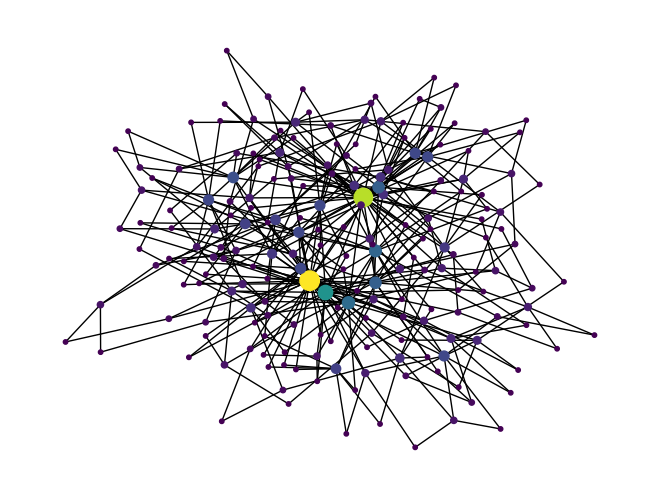

In [4]:
G = nx.barabasi_albert_graph(n=200,m=2)

k_centrality = nx.degree_centrality(G)
k_centrality = np.fromiter(k_centrality.values(), float)
nx.draw(G, node_size=k_centrality*1000, node_color=k_centrality)


In [5]:
list(Counter(nx.get_node_attributes(G, "status").values()).values())

[]

In [10]:
def maki_thompson_rumour_model(graph: nx.Graph, gamma: float, alpha: float, time_limit: int, random_start=True, number_infected=1, starting_nodes=[]):

    #Clear status of the nodes of the given graph
    #"status" tells the type of node (I - Ignorant, S - Spreader, R - Stifler)
    #"visit" tells if the node should be visited in a cycle or not

    node_status={key: "I" for key in graph.nodes}
    node_visit={key: False for key in graph.nodes}
    nx.set_node_attributes(graph, node_status, "status")
    nx.set_node_attributes(graph, node_visit, "visit")

    #Obtain a random sample of size "number_infected" out of the nodes of the given graph
    if random_start:
        starting_nodes = rand.sample(list(graph.nodes), number_infected)

    for node in starting_nodes:
        graph.nodes[node]["status"]="S"
        graph.nodes[node]["visit"]=True

        #All neighbours of spreaders should be visited in the cycle for possible changes
        for neighbor in graph.neighbors(node):
            graph.nodes[neighbor]["visit"]=True

    t=0

    #Counter for every status type, for each time value "t"
    counter=Counter(nx.get_node_attributes(graph, "status").values())
    status_count=[{"I": counter["I"], "S": counter["S"], "R": counter["R"]}]

    while t < time_limit:
        #Only apply node_changes at the end of the cycle, the changes have to be done all at the same time.
        node_changes=[]
        for node in graph.nodes(data=True):
            if node[1]["visit"]==True:

                #Counting the amount of each type of nodes in the neighbourhood of the visited node
                neighbours_status_count={"I":0, "S":0, "R":0}
                for neighbor in graph.neighbors(node[0]):
                    neighbours_status_count[graph.nodes[neighbor]["status"]]+=1

                #If this value is less than the probability of transforming then the status of the node changes
                transform_value = rand.uniform(0,1)

                #Transformation of the node status
                if node[1]["status"]=="I":
                    #(1-gamma)**neighbours_status_count["S"] gives the probability of the event that no spreader transmits the rumour. We only need one of the spreaders to pass the rumour to transform the ignorant into spreader
                    transform_threshold = 1-(1-gamma)**neighbours_status_count["S"]
                    if transform_value <= transform_threshold:
                        node_changes.append((node[0], "S", True))
                        for neighbor in graph.neighbors(node[0]):
                            if graph.nodes[neighbor]["status"]!="R":
                                node_changes.append((neighbor, graph.nodes[neighbor]["status"], True))
                elif node[1]["status"]=="S":
                     #Whenever we are transforming a spreader into a stiffler the stifflers and the spreaders contribute the same to the probability of transforming the spreader
                    transform_threshold = 1-(1-alpha)**(neighbours_status_count["S"] + neighbours_status_count["R"])
                    if transform_value <= transform_threshold:
                        node_changes.append((node[0], "R", False))
        
        #Applying all changes to the graph
        for node_change in node_changes:
            graph.nodes[node_change[0]]["status"]=node_change[1]
            graph.nodes[node_change[0]]["visit"]=node_change[2]
        
        counter=Counter(nx.get_node_attributes(graph, "status").values())
        status_count.append({"I": counter["I"], "S": counter["S"], "R": counter["R"]})
        t+=1
    return status_count

In [14]:
maki_thompson_rumour_model(G, gamma=0.1, alpha=0.01, time_limit = 100, number_infected=2)

[{'I': 198, 'S': 2, 'R': 0},
 {'I': 196, 'S': 4, 'R': 0},
 {'I': 196, 'S': 4, 'R': 0},
 {'I': 196, 'S': 4, 'R': 0},
 {'I': 196, 'S': 4, 'R': 0},
 {'I': 196, 'S': 4, 'R': 0},
 {'I': 195, 'S': 5, 'R': 0},
 {'I': 195, 'S': 5, 'R': 0},
 {'I': 194, 'S': 6, 'R': 0},
 {'I': 193, 'S': 7, 'R': 0},
 {'I': 193, 'S': 7, 'R': 0},
 {'I': 192, 'S': 8, 'R': 0},
 {'I': 188, 'S': 12, 'R': 0},
 {'I': 187, 'S': 13, 'R': 0},
 {'I': 184, 'S': 16, 'R': 0},
 {'I': 179, 'S': 20, 'R': 1},
 {'I': 173, 'S': 26, 'R': 1},
 {'I': 165, 'S': 34, 'R': 1},
 {'I': 160, 'S': 38, 'R': 2},
 {'I': 153, 'S': 45, 'R': 2},
 {'I': 143, 'S': 55, 'R': 2},
 {'I': 137, 'S': 61, 'R': 2},
 {'I': 131, 'S': 66, 'R': 3},
 {'I': 122, 'S': 75, 'R': 3},
 {'I': 114, 'S': 83, 'R': 3},
 {'I': 107, 'S': 87, 'R': 6},
 {'I': 94, 'S': 96, 'R': 10},
 {'I': 86, 'S': 104, 'R': 10},
 {'I': 79, 'S': 104, 'R': 17},
 {'I': 71, 'S': 111, 'R': 18},
 {'I': 63, 'S': 113, 'R': 24},
 {'I': 53, 'S': 121, 'R': 26},
 {'I': 44, 'S': 128, 'R': 28},
 {'I': 40, 'S': 